In [144]:
#bidirectional_lstm using one_hot in sentiment analysis

In [145]:
import pandas as pd
import numpy as np
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Activation,Dense,LSTM,Bidirectional,Dropout
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.utils import pad_sequences

In [146]:
pf=pd.read_csv("C:\\Users\\user\\OneDrive\\Documents\\setiment_analysis.csv")

In [147]:
pg=pd.DataFrame(pf)

In [148]:
pg.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,what a great day look like a dream,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [149]:
pg.isnull().sum()

Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
dtype: int64

In [150]:
#deleting the unwanted features

In [151]:
pg.drop("Year",axis=1,inplace=True)

In [152]:
pg.drop("Month",axis=1,inplace=True)

In [153]:
pg.drop("Day",axis=1,inplace=True)

In [154]:
pg.drop("Time of Tweet",axis=1,inplace=True)

In [155]:
pg.drop("Platform",axis=1,inplace=True)

In [156]:
pg.head()

,text,sentiment
0,what a great day look like a dream,positive
1,"I feel sorry, I miss you here in the sea beach",positive
2,Don't angry me,negative
3,We attend in the class just for listening teac...,negative
4,"Those who want to go, let them go",negative


In [157]:
stem=PorterStemmer()

In [158]:
corpus=[]
for i in range(len(pg)):
    review=re.sub("[^a-zA-Z]"," ",pg['text'][i])
    review=review.lower()
    review=review.split()
    review=[stem.stem(word) for word in review if word not in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [159]:
corpus

['great day look like dream',
 'feel sorri miss sea beach',
 'angri',
 'attend class listen teacher read slide nonsenc',
 'want go let go',
 'night feel neutral',
 'feed babi fun smile coo',
 'soooo high',
 '',
 'today first time arriv boat amaz journey',
 'love someth like e mc rule',
 'realli realli like song cardigan taylor swift',
 'sharpi run danger low ink',
 'want go music tonight lost voic',
 'alway somewher miss',
 'distrub',
 'care',
 'sick past day',
 'come back home past job realli good time',
 'never fall love found',
 'oh maya sorri hope find soon',
 'play kid amaz',
 'clean hous famili com later today',
 'tri shtdown pc accenditenli click restart button realli disgust',
 'follow follow',
 'amaz game play everyday',
 'sorri',
 'villag hardli found intern feel gloomi',
 'juss came back baris',
 'went sleep power cut villag',
 'look like compani new logo',
 'buy sophi world book realli happi',
 'consol got bmi test hahaha say obes well much unhappi minut',
 'funni cute kid'

In [160]:
count=0
for i in corpus:
    if len(i)==0:
        count=count+1

In [161]:
count

3

In [162]:
x=pg[list(map(lambda x:len(x)==0,corpus))]

In [163]:
x

,text,sentiment
8,Both of you,neutral
74,Both of you,neutral
328,There!,neutral


In [164]:
len(corpus)

499

In [165]:
vocab=450

In [166]:
one_hot=[one_hot(word,vocab) for word in corpus]

In [167]:
one_hot

[[168, 116, 178, 330, 406],
 [254, 80, 212, 38, 192],
 [226],
 [270, 166, 144, 344, 45, 113, 56],
 [449, 289, 270, 289],
 [188, 254, 358],
 [291, 28, 240, 357, 369],
 [369, 248],
 [],
 [88, 345, 112, 424, 398, 320, 79],
 [84, 193, 330, 7, 389, 428],
 [318, 318, 330, 370, 184, 198, 417],
 [384, 274, 250, 151, 100],
 [449, 289, 181, 67, 83, 423],
 [324, 418, 212],
 [284],
 [68],
 [408, 28, 116],
 [46, 250, 118, 28, 131, 318, 241, 112],
 [317, 145, 84, 230],
 [220, 236, 80, 414, 37, 343],
 [311, 38, 320],
 [390, 414, 251, 415, 24, 88],
 [265, 68, 111, 156, 183, 340, 246, 318, 147],
 [317, 317],
 [320, 425, 311, 130],
 [80],
 [296, 91, 230, 226, 254, 255],
 [379, 222, 250, 4],
 [431, 200, 42, 315, 296],
 [178, 330, 88, 186, 124],
 [319, 56, 1, 269, 318, 135],
 [64, 242, 373, 91, 353, 222, 412, 206, 381, 447, 265],
 [112, 27, 38],
 [442, 417, 425, 167, 265, 135, 354, 221, 166, 414, 311, 256],
 [192, 82, 316, 174, 17],
 [5, 11, 249, 278, 89, 28, 423, 189, 212, 397],
 [399, 130, 318, 1, 88, 4

In [168]:
maximum=max([len(vec) for vec in one_hot])

In [169]:
maximum

19

In [170]:
pad_sequences=pad_sequences(one_hot,padding='post',maxlen=maximum)

In [171]:
pad_sequences

array([[168, 116, 178, ...,   0,   0,   0],
       [254,  80, 212, ...,   0,   0,   0],
       [226,   0,   0, ...,   0,   0,   0],
       ...,
       [ 55,  94,  63, ...,   0,   0,   0],
       [330, 155,  99, ...,   0,   0,   0],
       [244,  54, 250, ...,   0,   0,   0]])

In [172]:
pad_sequences[0]

array([168, 116, 178, 330, 406,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0])

In [173]:
pad_sequences[8]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [174]:
vocab

450

In [175]:
maximum

19

In [176]:
model=Sequential()

In [177]:
model.add(Embedding(vocab,20,input_length=maximum))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [178]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
x=pad_sequences

In [181]:
pg['sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [182]:
value={'positive':2,'negative':1,'neutral':0}

In [183]:
pg['sentiment']=pg['sentiment'].map(value)

In [184]:
pg['sentiment']

0      2
1      2
2      1
3      1
4      1
      ..
494    1
495    1
496    0
497    2
498    1
Name: sentiment, Length: 499, dtype: int64

In [185]:
y=pg['sentiment']

In [186]:
y

0      2
1      2
2      1
3      1
4      1
      ..
494    1
495    1
496    0
497    2
498    1
Name: sentiment, Length: 499, dtype: int64

In [187]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=3)

In [188]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((399, 19), (100, 19), (399,), (100,))

In [189]:
history=model.fit(x_train,y_train,epochs=75,validation_data=(x_test,y_test),verbose=1)

Epoch 1/75


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.2666 - loss: 0.6286 - val_accuracy: 0.2700 - val_loss: 0.3943
Epoch 2/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2547 - loss: 0.2735 - val_accuracy: 0.2700 - val_loss: 0.3336
Epoch 3/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2812 - loss: 0.2901 - val_accuracy: 0.2700 - val_loss: 0.3048
Epoch 4/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2543 - loss: 0.1977 - val_accuracy: 0.2700 - val_loss: 0.2875
Epoch 5/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2570 - loss: 0.2624 - val_accuracy: 0.2700 - val_loss: 0.2776
Epoch 6/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2744 - loss: 0.1626 - val_accuracy: 0.2700 - val_loss: 0.2671
Epoch 7/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2506 - loss: 0.2664 - val_accuracy: 0.2700 - val_loss: 0.2242
Epoch 8/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2361 - loss: 0.2158 - val_accuracy: 0.2700 - val_loss: 0.

In [190]:
import matplotlib.pyplot as plt

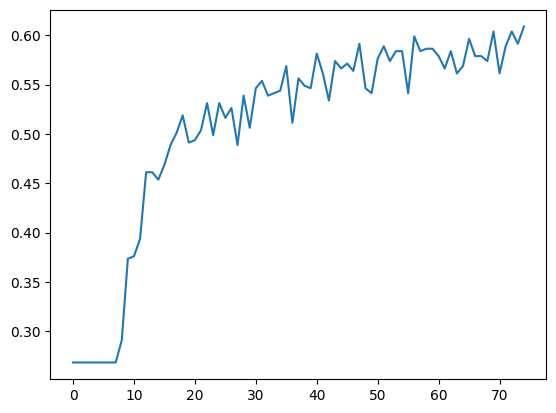

In [191]:
plt.plot(history.history['accuracy'])

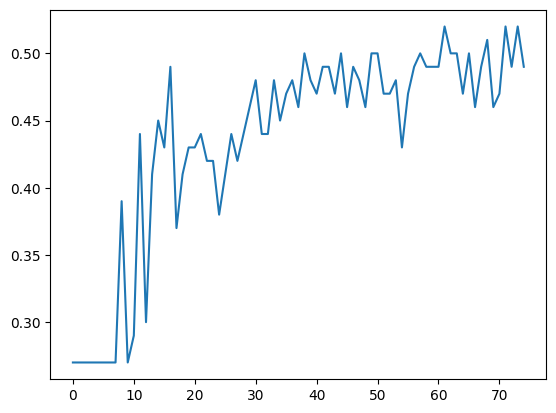

In [192]:
plt.plot(history.history['val_accuracy'])